<h1>Meteorite landings</h1>

В данной работе используются данные о метеоритах упавших на Землю. Они классифицируются по составу и методу обнаружения. 
По составу имеются классы : L6 (18%), Н5 (16%) и 30289 других классов (66%).
По методу обнаружения: падения (когда метеорит находят после наблюдения его падения в атмосфере) и находки (когда метеоритное происхождение материала определяется только путём анализа).
Второй способ классификации будет более информативным и конкретным для данной выборки, поэтому я буду использовать его в данной работе.

<div class="alert alert-block alert-info">
<b>Подключение необходимых библиотек</b></div>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline

<div class="alert alert-block alert-info">
<b>Чтение и разбор данных</b></div>

In [2]:
data = pd.read_csv('meteorite-landings.csv', sep=',', header=0,  engine='python')

In [3]:
data


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


<h4><em>Набор данных содержит следующие переменные:</em></h4>
<em>
<ul>
 <li>name : название метеорита (обычно местоположение, часто изменяемое числом, годом, составом и т. д.)</li>
 <li>id : уникальный идентификатор метеорита</li>
 <li>nametype :
 <ul>
 <li>Valid : типичный метеорит</li>
 <li>Relict : метеорит, сильно разрушенный погодными условиями на Земле</li>
 </ul>
 </li>
 <li>recclass : класс метеорита; один из большого количества классов на основе физических, химических и других характеристик</li>
 <li>mass : масса метеорита в граммах</li>
 <li>fall: <ul>
 <li>Fell : наблюдалось падение метеорита</li>
 <li>Found: падение метеорита не наблюдалось</li>
 </ul>
 </li>
 <li>year : год падения метеорита или год его обнаружения (в зависимости от величины падения )</li>
 <li>reclat : широта приземления метеорита</li>
 <li>reclong : долгота падения метеорита</li>
 <li>GeoLocation : заключенный в круглые скобки, разделенный запятыми кортеж, который объединяет reclat и reclong.</li>
 </ul>
 </em>

In [4]:
print(data)

             name     id nametype              recclass      mass   fall  \
0          Aachen      1    Valid                    L5      21.0   Fell   
1          Aarhus      2    Valid                    H6     720.0   Fell   
2            Abee      6    Valid                   EH4  107000.0   Fell   
3        Acapulco     10    Valid           Acapulcoite    1914.0   Fell   
4         Achiras    370    Valid                    L6     780.0   Fell   
...           ...    ...      ...                   ...       ...    ...   
45711  Zillah 002  31356    Valid               Eucrite     172.0  Found   
45712      Zinder  30409    Valid  Pallasite, ungrouped      46.0  Found   
45713        Zlin  30410    Valid                    H4       3.3  Found   
45714   Zubkovsky  31357    Valid                    L6    2167.0  Found   
45715  Zulu Queen  30414    Valid                  L3.7     200.0  Found   

         year    reclat    reclong               GeoLocation  
0      1880.0  50.77500 

<div class="alert alert-block alert-info">
<b>Визуализация данных и вычисление основных значений</b></div>

In [5]:
data.describe()


,id,mass,year,reclat,reclong
count,45716.000000,4.558500e+04,45428.000000,38401.000000,38401.000000
mean,26889.735104,1.327808e+04,1991.772189,-39.122580,61.074319
std,16860.683030,5.749889e+05,27.181247,46.378511,80.647298
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.750000,7.200000e+00,1987.000000,-76.714240,0.000000
50%,24261.500000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.750000,2.026000e+02,2003.000000,0.000000,157.166670
max,57458.000000,6.000000e+07,2501.000000,81.166670,354.473330


<h4><em>Диаграмма зависимости признаков друг от друга:</em></h4>

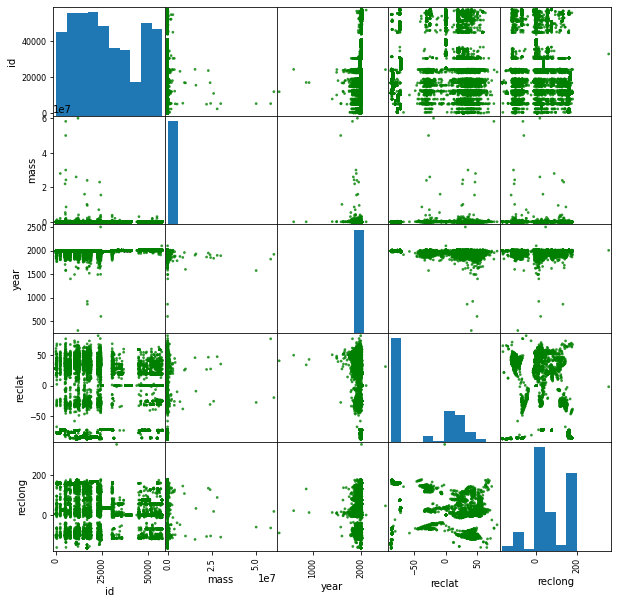

In [6]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .8,marker='.', color='green', s=30 ,figsize = (10, 10))
pass


<h4><em>Построим заивисимость reclat от reclong:</em></h4>

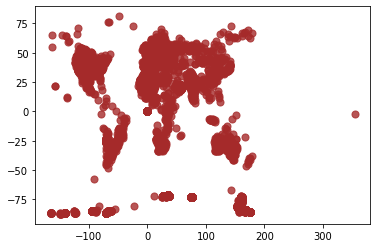

In [7]:
plt.scatter(data['reclong'], data['reclat'], alpha=0.8, color='brown', s = 50)
pass

<em>Этот график позволяет примерно понять в каких местах чаще находили метеориты.</em>

<h4><em>Построим зависимость year от mass:</em></h4>

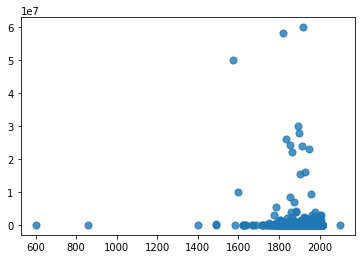

In [8]:
plt.scatter(data['year'], data['mass'],alpha=0.8, s = 50)
pass

<h4><em>Построим матрицу корреляции</em></h4>

In [9]:
data.corr()

,id,mass,year,reclat,reclong
id,1.000000,-0.018911,0.330700,0.271095,-0.333863
mass,-0.018911,1.000000,-0.116569,0.029087,-0.021860
year,0.330700,-0.116569,1.000000,-0.105277,0.085706
reclat,0.271095,0.029087,-0.105277,1.000000,-0.591539
reclong,-0.333863,-0.021860,0.085706,-0.591539,1.000000


<em>Представим ее в более удобном для восприятия формате:</em>

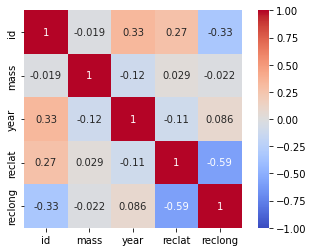

In [10]:
sns.heatmap(data.corr(), annot = True, square=True, vmin=-1, vmax=1,cmap='coolwarm')
pass

<em>Чем светлее ячейка, тем больше по абсолютной величине коэффициент корреляции. Следовательно, нет сильно коррелирующих признаков.<em>

<div class="alert alert-block alert-info">
<b>Обработка выбросов</b></div>


<h4><em>Рассмотрим столбцы reclong и reclat.</em></h4>

c:\users\netwe\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


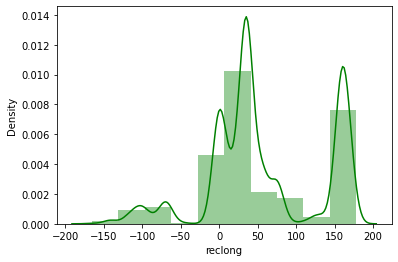

In [63]:
sns.distplot(data['reclong'], color='green',bins = 10)
pass

c:\users\netwe\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


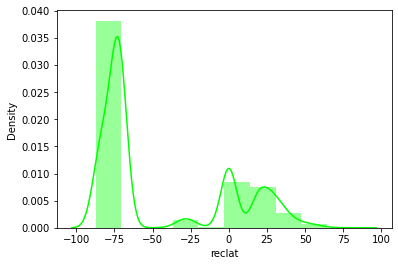

In [64]:
sns.distplot(data['reclat'], color='lime', bins = 10)
pass

<em>Видно, что имеется немного значений больше 180 в reclong, что не соответсвует реальности. Уберем их:</em>

In [13]:
rows_to_drop = data[
    (data['reclong'] < -180) | (data['reclong'] > 180)].index
data = data.drop(rows_to_drop)
data.shape

(45715, 10)

<h4><em>Рассмотрим столбец year.</em></h4>

c:\users\netwe\appdata\local\programs\python\python38-32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


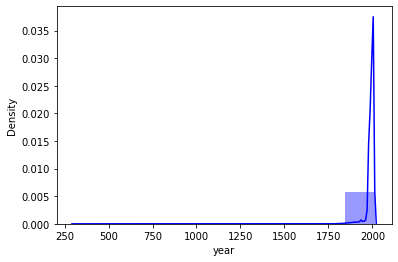

In [65]:
sns.distplot(data['year'],color='blue', bins = 10)
pass

<em>Также избавимся от значений >2021 года:</em>

In [15]:
rows_to_drop = data[
    (data['year'] > 2021)].index
data = data.drop(rows_to_drop)
data.shape

(45713, 10)

<div class="alert alert-block alert-info">
<b>Обработка пропущенных значений</b></div>

In [16]:
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


<em>Удалим строки, содержащие пустые значения:</em>

In [17]:
data.dropna(axis = 0)


,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


<em>45713-38115 = 7598 строк, содержат пустые значения.</em>


<em>Разделим столбцы, содержащие категориальные и числовые признаки:</em>

In [18]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['name', 'nametype', 'recclass', 'fall', 'GeoLocation']
['id', 'mass', 'year', 'reclat', 'reclong']


In [19]:
for c in categorical_columns:
    print(c, data[c].unique())

name ['Aachen' 'Aarhus' 'Abee' ... 'Zlin' 'Zubkovsky' 'Zulu Queen']
nametype ['Valid' 'Relict']
recclass ['L5' 'H6' 'EH4' 'Acapulcoite' 'L6' 'LL3-6' 'H5' 'L' 'Diogenite-pm'
 'Unknown' 'H4' 'H' 'Iron, IVA' 'CR2-an' 'LL5' 'CI1' 'L/LL4'
 'Eucrite-mmict' 'CV3' 'Ureilite-an' 'Stone-uncl' 'L3' 'Angrite' 'LL6'
 'L4' 'Aubrite' 'Iron, IIAB' 'Iron, IAB-sLL' 'Iron, ungrouped' 'CM2' 'OC'
 'Mesosiderite-A1' 'LL4' 'C2-ung' 'LL3.8' 'Howardite' 'Eucrite-pmict'
 'Diogenite' 'LL3.15' 'LL3.9' 'Iron, IAB-MG' 'H/L3.9' 'Iron?' 'Eucrite'
 'H4-an' 'L/LL6' 'Iron, IIIAB' 'H/L4' 'H4-5' 'L3.7' 'LL3.4'
 'Martian (chassignite)' 'EL6' 'H3.8' 'H3-5' 'H5-6' 'Mesosiderite' 'H5-7'
 'L3-6' 'H4-6' 'Ureilite' 'Iron, IID' 'Mesosiderite-A3/4' 'CO3.3' 'H3'
 'EH3/4-an' 'Iron, IIE' 'L/LL5' 'H3.7' 'CBa' 'H4/5' 'H3/4' 'H?' 'H3-6'
 'L3.4' 'Iron, IAB-sHL' 'L3.7-6' 'EH7-an' 'Iron' 'CR2' 'CO3.2' 'K3' 'L5/6'
 'CK4' 'Iron, IIE-an' 'L3.6' 'LL3.2' 'CO3.5' 'Lodranite' 'Mesosiderite-A3'
 'L3-4' 'H5/6' 'Pallasite, PMG' 'Eucrite-cm' 'Pallasi

<em>Выберем средние значения по столбцам и заполним ими пропущенные в числовых признаках:</em>

In [20]:
data.median(axis = 0, numeric_only=True)

id         24261.00000
mass          32.60000
year        1998.00000
reclat       -71.50000
reclong       35.66667
dtype: float64

In [21]:
data = data.fillna(data.median(axis = 0, numeric_only=True), axis = 0)

In [22]:
data[numerical_columns].count(axis = 0)

id         45713
mass       45713
year       45713
reclat     45713
reclong    45713
dtype: int64

<em>Теперь в данных столбцах нет пропущенных значений.</em>

<em>Сделаем тоже самое с категориальными признаками.</em>

In [23]:
data[categorical_columns].count(axis = 0)

name           45713
nametype       45713
recclass       45713
fall           45713
GeoLocation    38398
dtype: int64

<em>В столбце Geolocation не хватает 45713-38398=7315 значений. Заполним их:</em>

In [24]:
data['GeoLocation'].describe()

count                    38398
unique                   17098
top       (0.000000, 0.000000)
freq                      6213
Name: GeoLocation, dtype: object

In [25]:
data.loc[data.GeoLocation == "?", 'GeoLocation'] = None

In [26]:
data.describe(include = [object])

,name,nametype,recclass,fall,GeoLocation
count,45713,45713,45713,45713,38398
unique,45713,2,466,2,17098
top,Aachen,Valid,L6,Found,"(0.000000, 0.000000)"
freq,1,45638,8285,44606,6213


In [27]:
type(data['GeoLocation'].describe())

pandas.core.series.Series

In [28]:
data['GeoLocation'].describe().top

'(0.000000, 0.000000)'

In [29]:
data['GeoLocation'] = data['GeoLocation'].fillna('(0.000000, 0.000000)')

Соединим в одну таблицу:

In [30]:
data.describe(include = [object])

,name,nametype,recclass,fall,GeoLocation
count,45713,45713,45713,45713,45713
unique,45713,2,466,2,17098
top,Aachen,Valid,L6,Found,"(0.000000, 0.000000)"
freq,1,45638,8285,44606,13528


In [31]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [32]:
data.describe(include = [object])

,name,nametype,recclass,fall,GeoLocation
count,45713,45713,45713,45713,45713
unique,45713,2,466,2,17098
top,Aachen,Valid,L6,Found,"(0.000000, 0.000000)"
freq,1,45638,8285,44606,13528


In [33]:
data.dropna(axis = 0)

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,Aachen,1,Valid,L5,21.0,Fell,1880.0,50.77500,6.08333,"(50.775000, 6.083330)"
1,Aarhus,2,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,"(56.183330, 10.233330)"
2,Abee,6,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,"(54.216670, -113.000000)"
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,"(16.883330, -99.900000)"
4,Achiras,370,Valid,L6,780.0,Fell,1902.0,-33.16667,-64.95000,"(-33.166670, -64.950000)"
...,...,...,...,...,...,...,...,...,...,...
45711,Zillah 002,31356,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,"(29.037000, 17.018500)"
45712,Zinder,30409,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,"(13.783330, 8.966670)"
45713,Zlin,30410,Valid,H4,3.3,Found,1939.0,49.25000,17.66667,"(49.250000, 17.666670)"
45714,Zubkovsky,31357,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,"(49.789170, 41.504600)"


<em>В таблице 45713 строк, следовательно все пропущенные значения заполнены.</em>

<div class="alert alert-block alert-info">
<b>Векторизация</b></div>

<em>Выделим бинарные и небинарные столбцы:</em>

In [34]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

['nametype', 'fall'] ['name', 'recclass', 'GeoLocation']


<h4><em>Работа с бинарными столбцами.</em></h4>

<em>Бинарным столбцам дадим значения 0 или 1,которые соответсвуют определенным значениям.</em>

In [35]:
data['nametype'].unique()

array(['Valid', 'Relict'], dtype=object)

In [36]:
data.at[data['nametype'] == 'Valid', 'nametype'] = 0
data.at[data['nametype'] == 'Relict', 'nametype'] = 1
data['nametype'].describe()

count     45713
unique        2
top           0
freq      45638
Name: nametype, dtype: int64

In [37]:
data['fall'].unique()

array(['Fell', 'Found'], dtype=object)

In [38]:
data.at[data['fall'] == 'Fell', 'fall'] = 0
data.at[data['fall'] == 'Found', 'fall'] = 1
data['fall'].describe()

count     45713
unique        2
top           1
freq      44606
Name: fall, dtype: int64

<h4><em>Работа с небинарными столбцами.</em></h4>

In [39]:
data[nonbinary_columns]

,name,recclass,GeoLocation
0,Aachen,L5,"(50.775000, 6.083330)"
1,Aarhus,H6,"(56.183330, 10.233330)"
2,Abee,EH4,"(54.216670, -113.000000)"
3,Acapulco,Acapulcoite,"(16.883330, -99.900000)"
4,Achiras,L6,"(-33.166670, -64.950000)"
...,...,...,...
45711,Zillah 002,Eucrite,"(29.037000, 17.018500)"
45712,Zinder,"Pallasite, ungrouped","(13.783330, 8.966670)"
45713,Zlin,H4,"(49.250000, 17.666670)"
45714,Zubkovsky,L6,"(49.789170, 41.504600)"


In [40]:
from sklearn import preprocessing
data_describe=data.describe(include=[object])
number=preprocessing.LabelEncoder()
data["name"]=number.fit_transform(data["name"])
data["recclass"]=number.fit_transform(data["recclass"])
data["GeoLocation"]=number.fit_transform(data["GeoLocation"])

In [41]:
data

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,GeoLocation
0,0,1,0,327,21.0,0,1880.0,50.77500,6.08333,16775
1,1,2,0,191,720.0,0,1951.0,56.18333,10.23333,16979
2,5,6,0,84,107000.0,0,1952.0,54.21667,-113.00000,16919
3,9,10,0,0,1914.0,0,1976.0,16.88333,-99.90000,9103
4,405,370,0,333,780.0,0,1902.0,-33.16667,-64.95000,841
...,...,...,...,...,...,...,...,...,...,...
45711,45629,31356,0,103,172.0,1,1990.0,29.03700,17.01850,14395
45712,45630,30409,0,435,46.0,1,1999.0,13.78333,8.96667,9079
45713,45631,30410,0,175,3.3,1,1939.0,49.25000,17.66667,16698
45714,45635,31357,0,333,2167.0,1,2003.0,49.78917,41.50460,16722


<div class="alert alert-block alert-info">
<b>Нормализация количественных признаков</b></div>

<em>Мы будем использовать метод ближайших соседей, а он чувствителен к к масштабированию данных. Поэтому количественные признаки следует нормализовать.</em>

In [42]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,id,mass,year,reclat,reclong
count,45713.000000,4.571300e+04,45713.000000,45713.000000,45713.000000
mean,26889.004572,1.324099e+04,1991.797607,-44.306820,57.003831
std,16860.614715,5.741837e+05,26.991110,44.131695,74.487489
min,1.000000,0.000000e+00,301.000000,-87.366670,-165.433330
25%,12688.000000,7.200000e+00,1987.000000,-76.266670,13.256500
50%,24261.000000,3.260000e+01,1998.000000,-71.500000,35.666670
75%,40656.000000,2.011000e+02,2003.000000,0.000000,155.750000
max,57458.000000,6.000000e+07,2013.000000,81.166670,178.200000


<em>Каждый количественный признак приведем к нулевому среднему и единичному среднеквадратичному отклонению:</em>

In [43]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [44]:
data_numerical.describe()

,id,mass,year,reclat,reclong
count,4.571300e+04,4.571300e+04,4.571300e+04,4.571300e+04,4.571300e+04
mean,-3.979151e-17,-5.284810e-18,2.138794e-15,6.466121e-17,1.989576e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.594723e+00,-2.306055e-02,-6.264276e+01,-9.757126e-01,-2.986235e+00
25%,-8.422590e-01,-2.304801e-02,-1.777477e-01,-7.241927e-01,-5.873111e-01
50%,-1.558665e-01,-2.300377e-02,2.297939e-01,-6.161825e-01,-2.864529e-01
75%,8.165180e-01,-2.271031e-02,4.150401e-01,1.003968e+00,1.325675e+00
max,1.813042e+00,1.044731e+02,7.855325e-01,2.843160e+00,1.627067e+00


In [45]:
data.describe()

,name,id,recclass,mass,year,reclat,reclong,GeoLocation
count,45713.000000,45713.000000,45713.000000,4.571300e+04,45713.000000,45713.000000,45713.000000,45713.000000
mean,22856.000000,26889.004572,256.466454,1.324099e+04,1991.797607,-44.306820,57.003831,7151.255267
std,13196.350765,16860.614715,97.992565,5.741837e+05,26.991110,44.131695,74.487489,4236.801305
min,0.000000,1.000000,0.000000,0.000000e+00,301.000000,-87.366670,-165.433330,0.000000
25%,11428.000000,12688.000000,184.000000,7.200000e+00,1987.000000,-76.266670,13.256500,3543.000000
50%,22856.000000,24261.000000,276.000000,3.260000e+01,1998.000000,-71.500000,35.666670,8931.000000
75%,34284.000000,40656.000000,333.000000,2.011000e+02,2003.000000,0.000000,155.750000,9016.000000
max,45712.000000,57458.000000,465.000000,6.000000e+07,2013.000000,81.166670,178.200000,17097.000000


<div class="alert alert-block alert-info">
<b>Тестовая и обучающая выборки</b></div>

In [46]:
X = data.drop('fall', axis = 1) 
y = data['fall']
feature_names = X.columns

In [47]:
type(feature_names)

pandas.core.indexes.base.Index

In [48]:
feature_names

Index(['name', 'id', 'nametype', 'recclass', 'mass', 'year', 'reclat',
       'reclong', 'GeoLocation'],
      dtype='object')

In [49]:
X = X.to_numpy()

In [50]:
y = y.to_numpy(dtype='int32')

In [51]:
y


array([0, 0, 0, ..., 1, 1, 1])

In [52]:
print(X.shape)
print(y.shape)
N, d = X.shape

(45713, 9)
(45713,)


In [53]:
type(X)

numpy.ndarray

In [54]:
type(y)

numpy.ndarray

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print('Количество обучающих и тестовых данных =  ' + str(N_train) + ' и ' + str(N_test))

Количество обучающих и тестовых данных =  31999 и 13714


<div class="alert alert-block alert-info">
<b>kNN</b></div>

In [56]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 10)
#knn.set_params(n_neighbors=10)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [57]:
y_test_predict = knn.predict(X_test)
err_test  = np.mean(y_test  != y_test_predict)

In [58]:
err_test

0.025667201400029167

In [59]:
from sklearn.metrics import confusion_matrix

print(confusion_matrix(y_test, y_test_predict))

[[   94   255]
 [   97 13268]]


In [60]:
confusion_matrix([0,1,0,1,0], [0,1,0,0,0])

array([[3, 0],
       [1, 1]], dtype=int64)

<h4><em>Подбор параметров.</em></h4>

In [61]:
from sklearn.model_selection import GridSearchCV
nnb = [1, 3, 5, 10, 15, 20, 25, 35, 45, 55]
knn = KNeighborsClassifier()
grid = GridSearchCV(knn, param_grid = {'n_neighbors': nnb}, cv=10)
grid.fit(X_train, y_train)

best_cv_err = 1 - grid.best_score_
best_n_neighbors = grid.best_estimator_.n_neighbors
print(best_cv_err, best_n_neighbors)

0.02365699241950614 55


<em>Лучший результат при наибольшем параметре = 55.</em>

<h4><em>Вычисление ошибки на выборках.</em></h4>

In [62]:
knn = KNeighborsClassifier(n_neighbors = best_n_neighbors).fit(X_train, y_train)

err_train = np.mean(y_train != knn.predict(X_train))
err_test  = np.mean(y_test  != knn.predict(X_test))

print(err_train, err_test)

0.023688240257508045 0.025229692285255942


<div class="alert alert-block alert-info">
<b>Вывод</b></div>

<em> Метод ближайших k соседей даёт хороший результат на данной выборке данных, а именно 2.4% и 2.2% ошибки на обучающей и тестовой выборках соответственно. Также было замечено, что большее число k дает лучший результат.Также данные были визуализированы и приведены к более подходящему виду.  </em> 